In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [161]:
df = pd.read_csv('suicide homicide gdp.csv')

In [162]:
df.columns

Index(['country', 'iso3c', 'iso2c', 'year',
       'Intentional homicides (per 100,000 people)',
       'Suicide mortality rate (per 100,000 population)', 'GDP (current US$)',
       'GDP per capita, PPP (current international $)', 'adminregion',
       'incomeLevel'],
      dtype='object')

In [163]:
df.isna().sum()

country                                               0
iso3c                                               102
iso2c                                               153
year                                                  0
Intentional homicides (per 100,000 people)         9726
Suicide mortality rate (per 100,000 population)    8946
GDP (current US$)                                  2170
GDP per capita, PPP (current international $)      6328
adminregion                                        6579
incomeLevel                                         102
dtype: int64

In [164]:
df.drop(['iso3c', 'iso2c'], axis = 1, inplace = True)

In [165]:
df.isna().sum()

country                                               0
year                                                  0
Intentional homicides (per 100,000 people)         9726
Suicide mortality rate (per 100,000 population)    8946
GDP (current US$)                                  2170
GDP per capita, PPP (current international $)      6328
adminregion                                        6579
incomeLevel                                         102
dtype: int64

In [166]:
countries = df.groupby('country')

In [167]:
df['year'] = pd.to_datetime(df['year'],  format = '%Y')

In [168]:
df.set_index('year', inplace = True)

In [169]:
df[['Intentional homicides (per 100,000 people)', 'Suicide mortality rate (per 100,000 population)'
   , 'GDP (current US$)', 'GDP per capita, PPP (current international $)']]= df[['Intentional homicides (per 100,000 people)', 'Suicide mortality rate (per 100,000 population)'
   , 'GDP (current US$)', 'GDP per capita, PPP (current international $)']].interpolate(method = 'time')

In [170]:
adminregion = df['adminregion']

In [171]:
df.drop(['adminregion'], axis = 1, inplace = True)

In [172]:
df['incomeLevel'].unique()

array(['Low income', 'Aggregates', 'Upper middle income',
       'Lower middle income', 'High income', nan, 'Not classified'],
      dtype=object)

In [173]:
df.loc[df['incomeLevel'].isna(), 'incomeLevel'] = 'Not classified'

In [174]:
df['incomeLevel'].value_counts(dropna = False)

incomeLevel
High income            4029
Upper middle income    2805
Lower middle income    2805
Aggregates             2397
Low income             1377
Not classified          153
Name: count, dtype: int64

In [175]:
df.isna().sum()

country                                             0
Intentional homicides (per 100,000 people)         39
Suicide mortality rate (per 100,000 population)    30
GDP (current US$)                                   0
GDP per capita, PPP (current international $)      32
incomeLevel                                         0
dtype: int64

In [176]:
df.dropna(inplace = True)

In [177]:
df.shape

(13527, 6)

In [178]:
incomes = df.groupby('incomeLevel')

In [179]:
incomes['Suicide mortality rate (per 100,000 population)'].mean().sort_values().drop('Aggregates')

incomeLevel
Not classified         5.432927
Low income             6.036697
Lower middle income    7.276695
Upper middle income    7.480910
High income            8.175790
Name: Suicide mortality rate (per 100,000 population), dtype: float64

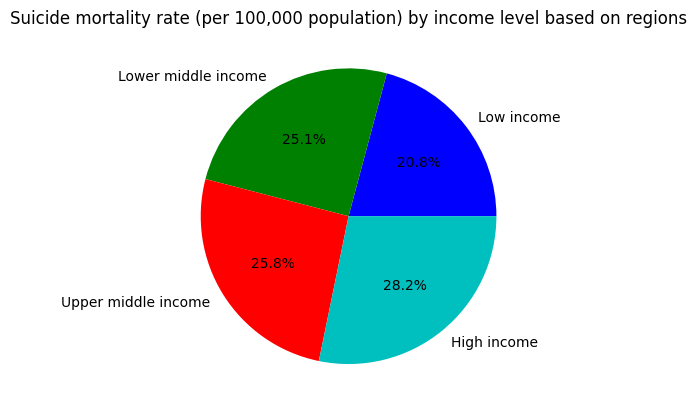

In [180]:
plt.pie(incomes['Suicide mortality rate (per 100,000 population)'].mean().sort_values().drop(['Aggregates', 'Not classified']),
        labels = incomes['Suicide mortality rate (per 100,000 population)'].mean().sort_values().drop(['Aggregates', 'Not classified']).index, autopct='%1.1f%%',
       colors = ['b','g' , 'r', 'c'])
plt.title('Suicide mortality rate (per 100,000 population) by income level based on regions')
plt.show()

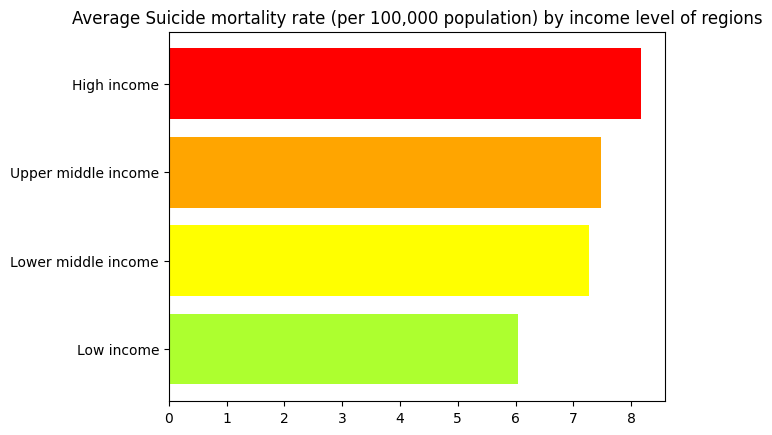

In [181]:
plt.barh(incomes['Suicide mortality rate (per 100,000 population)'].mean().sort_values().drop(['Aggregates', 'Not classified']).index, 
        width = incomes['Suicide mortality rate (per 100,000 population)'].mean().sort_values().drop(['Aggregates', 'Not classified']), color = ['greenyellow', 'yellow', 'orange', 'red'])
plt.title('Average Suicide mortality rate (per 100,000 population) by income level of regions')
plt.show()

In [182]:
incomes['Intentional homicides (per 100,000 people)'].mean().drop(['Aggregates', 'Not classified'])

incomeLevel
High income            11.673162
Low income             12.603071
Lower middle income    13.810018
Upper middle income    14.689591
Name: Intentional homicides (per 100,000 people), dtype: float64

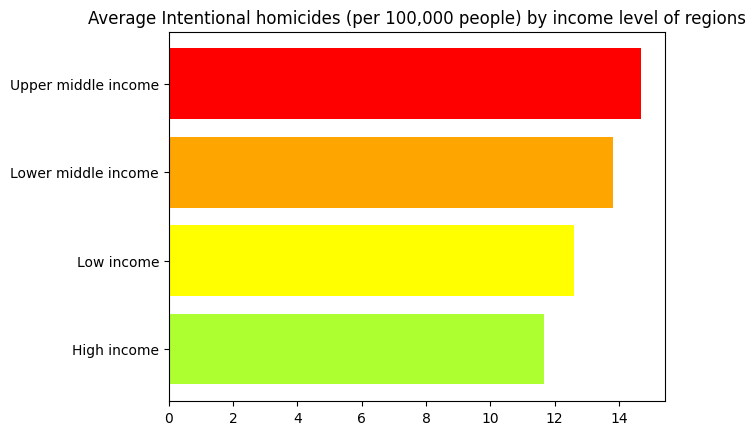

In [183]:
plt.barh(incomes['Intentional homicides (per 100,000 people)'].mean().drop(['Aggregates', 'Not classified']).index,
        width = incomes['Intentional homicides (per 100,000 people)'].mean().drop(['Aggregates', 'Not classified']),
        color = ['greenyellow', 'yellow', 'orange', 'red'])
plt.title('Average Intentional homicides (per 100,000 people) by income level of regions')
plt.show()

In [184]:
countries = df.groupby('country')

In [185]:
topmost = countries['Suicide mortality rate (per 100,000 population)'].mean().sort_values(ascending = False).head(10).sort_values()

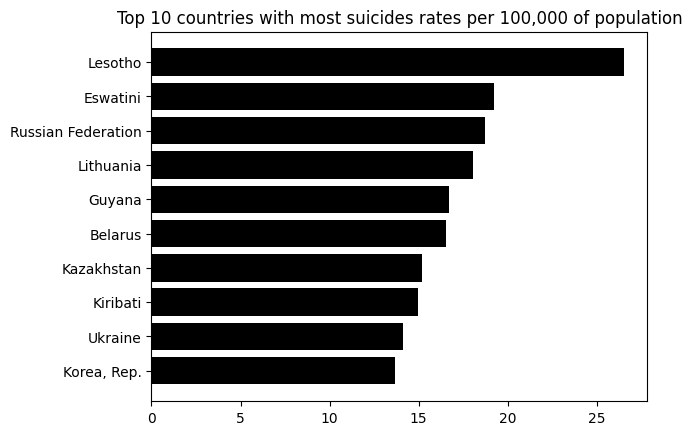

In [186]:
plt.barh(topmost.index, 
        width = topmost,
        color = 'black')
plt.title('Top 10 countries with most suicides rates per 100,000 of population')
plt.show()

In [187]:
least10 = countries['Suicide mortality rate (per 100,000 population)'].mean().sort_values(ascending = True).head(10).sort_values(ascending = False)

In [188]:
least10

country
Honduras                 4.084314
Brunei Darussalam        3.990196
Philippines              3.982353
Jamaica                  3.943137
Jordan                   3.860784
Grenada                  3.849020
Syrian Arab Republic     3.770588
Sao Tome and Principe    3.741176
Barbados                 3.601961
Antigua and Barbuda      3.415686
Name: Suicide mortality rate (per 100,000 population), dtype: float64

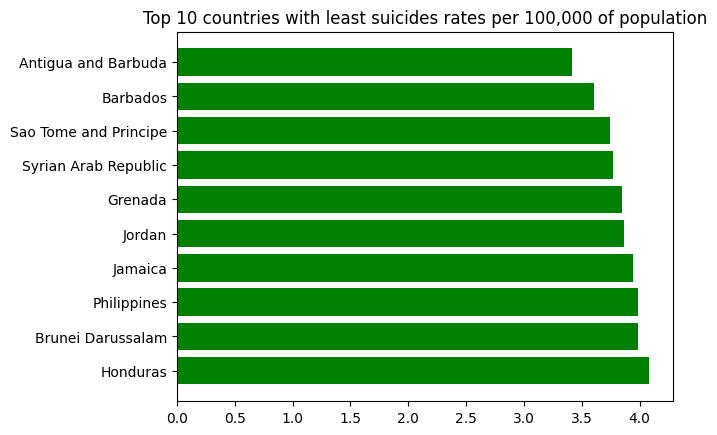

In [189]:
plt.barh(least10.index, 
        width = least10,
        color = 'green')
plt.title('Top 10 countries with least suicides rates per 100,000 of population')
plt.show()

In [190]:
lesotho_df = df.loc[(df['country'] == 'Lesotho') & (df.index >= '2000') & (df.index <= '2019')]

In [191]:
eswatini_df = df.loc[(df['country'] == 'Eswatini') & (df.index >= '2000') & (df.index <= '2019')]

In [192]:
russia_df = df.loc[(df['country'] == 'Russian Federation') & (df.index >= '2000') & (df.index <= '2019')]

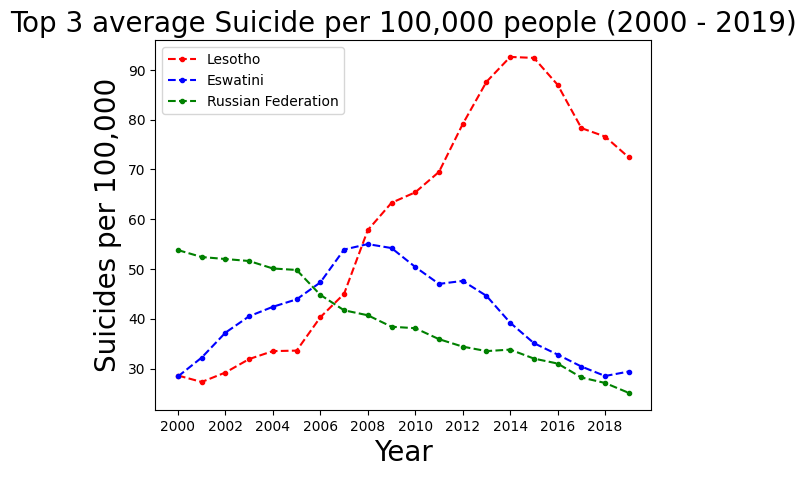

In [193]:
plt.plot(lesotho_df['Suicide mortality rate (per 100,000 population)'], 'r--.', label = 'Lesotho')
plt.plot(eswatini_df['Suicide mortality rate (per 100,000 population)'], 'b--.', label = 'Eswatini')
plt.plot(russia_df['Suicide mortality rate (per 100,000 population)'], 'g--.', label = 'Russian Federation')
plt.title('Top 3 average Suicide per 100,000 people (2000 - 2019)', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Suicides per 100,000', fontsize = 20)     
plt.legend()
plt.show()